In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd # cleaning the data
import numpy as np  # for large calculations
import matplotlib.pyplot as plt # matlab
import seaborn as sns
import missingno as msno

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # 0.1
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn import datasets, linear_model
from sklearn import preprocessing


import time
# visual libraries
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
# sklearn libraries
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# machine learning
# sklearn
# tensorflow


path = '/content/drive/MyDrive/data.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
df1 = df.iloc[:,:]
df1.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
# copy the data
df = df.copy()

  
# apply normalization techniques
for column in df.columns[1:-1]:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    
  
# view normalized data
print(df)

       Unnamed: 0        X1        X2        X3        X4        X5        X6  \
0      X21.V1.791  0.553717  0.571107  0.584371  0.598207  0.599275  0.526728   
1      X15.V1.924  0.624123  0.625176  0.620328  0.629447  0.637957  0.579905   
2         X8.V1.1  0.506872  0.506618  0.506229  0.522997  0.531581  0.481668   
3       X16.V1.60  0.486396  0.489158  0.492356  0.507087  0.514355  0.465155   
4       X20.V1.54  0.513324  0.499296  0.491789  0.504194  0.517679  0.478310   
...           ...       ...       ...       ...       ...       ...       ...   
11495  X22.V1.114  0.509677  0.511405  0.513024  0.526179  0.530372  0.479989   
11496  X19.V1.354  0.502665  0.514503  0.527463  0.555973  0.583862  0.550798   
11497    X8.V1.28  0.519776  0.519290  0.515855  0.529071  0.544273  0.499020   
11498  X10.V1.932  0.504628  0.510560  0.516988  0.530229  0.540647  0.495102   
11499  X16.V1.210  0.523983  0.529147  0.535674  0.554527  0.563614  0.509096   

             X7        X8  

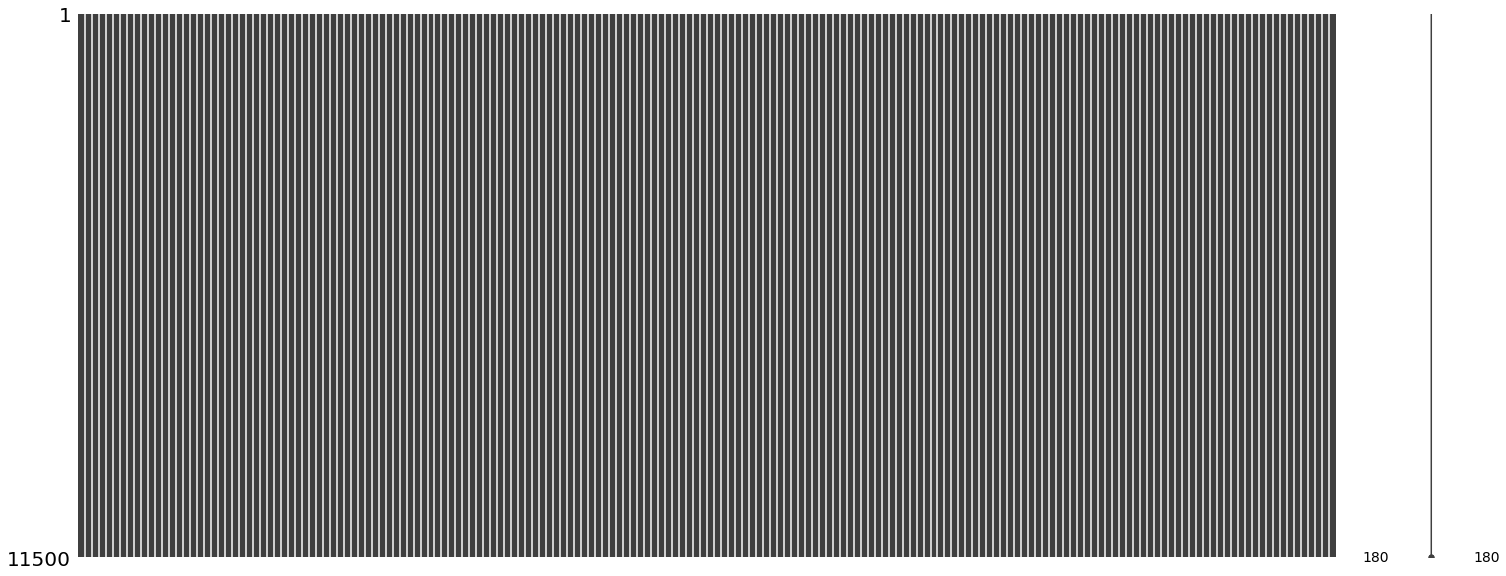

In [ ]:
msno.matrix(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed: 0 to y
dtypes: float64(178), int64(1), object(1)
memory usage: 15.8+ MB


In [ ]:
negative_results = len(df[df['y']==0])
positive_results = len(df[df['y']==1])
per_of_negative = negative_results/(negative_results + positive_results)
print("percentage of negative results is", per_of_negative*100)
per_of_positive = positive_results/(negative_results + positive_results)
print("percentage of positive results is", per_of_positive*100)

percentage of negative results is 0.0
percentage of positive results is 100.0


In [ ]:
df["y"].replace({2: 0, 3: 0, 4: 0, 5: 0}, inplace=True)

In [ ]:
df["y"].value_counts()

0    9200
1    2300
Name: y, dtype: int64

In [ ]:
df.pop("Unnamed: 0")

0        X21.V1.791
1        X15.V1.924
2           X8.V1.1
3         X16.V1.60
4         X20.V1.54
            ...    
11495    X22.V1.114
11496    X19.V1.354
11497      X8.V1.28
11498    X10.V1.932
11499    X16.V1.210
Name: Unnamed: 0, Length: 11500, dtype: object

In [ ]:
X = df.drop(columns=['y'])
y = df['y']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state=0)
X_test

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
4313,0.511360,0.516756,0.515006,0.529939,0.537927,0.490064,0.478216,0.474771,0.485207,0.490547,...,0.502176,0.539791,0.586455,0.581223,0.562203,0.521812,0.485213,0.461076,0.454425,0.485310
4340,0.559046,0.558153,0.556908,0.566966,0.570867,0.513854,0.487755,0.476078,0.479033,0.477517,...,0.417200,0.501921,0.600539,0.637622,0.603039,0.513476,0.425020,0.360502,0.341812,0.393162
10982,0.516690,0.517882,0.520385,0.532832,0.539740,0.489784,0.470224,0.463791,0.470800,0.474706,...,0.476069,0.511800,0.560384,0.557244,0.548591,0.522367,0.492280,0.470219,0.461314,0.491720
7986,0.506872,0.509152,0.510193,0.525600,0.531278,0.482788,0.463264,0.454379,0.462825,0.465764,...,0.471461,0.509605,0.555589,0.549814,0.540994,0.513754,0.483381,0.461860,0.454955,0.486111
6263,0.481066,0.482963,0.490374,0.504194,0.508613,0.471033,0.471255,0.473203,0.491124,0.498978,...,0.468902,0.508233,0.552292,0.552178,0.563469,0.550431,0.525779,0.504702,0.488341,0.497596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9215,0.506311,0.504928,0.506229,0.521261,0.530976,0.485866,0.473318,0.473464,0.485464,0.486970,...,0.489378,0.522503,0.563980,0.557582,0.548908,0.528480,0.500654,0.479363,0.469528,0.496528
8299,0.525666,0.529147,0.530578,0.544403,0.549713,0.497901,0.474865,0.466405,0.474916,0.479305,...,0.442795,0.473106,0.510638,0.495778,0.486863,0.464573,0.437582,0.417712,0.413620,0.450588
10409,0.506311,0.512250,0.516704,0.538617,0.553642,0.513014,0.494715,0.486536,0.489323,0.483648,...,0.469158,0.485181,0.515433,0.511651,0.525799,0.518199,0.498299,0.487722,0.489401,0.512821
2588,0.509116,0.505491,0.502548,0.513451,0.519492,0.469913,0.452178,0.442092,0.448932,0.451967,...,0.459176,0.493688,0.541504,0.535968,0.528015,0.505418,0.477885,0.456113,0.447536,0.479167


In [ ]:
linear = linear_model.LogisticRegression()
linear.fit(X_train,y_train)
linear_pred = linear.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
accuracy_score(y_test,linear_pred)

0.8069565217391305

In [ ]:
# from sklearn.neural_network import MLPClassifier
# mlp=MLPClassifier(hidden_layer_sizes=(5,2),activation='relu')
# mlp
# mlp.fit(X_train,y_train)
# pred=mlp.predict(X_test)
# accuracy_score(y_test,pred)